# Código para las redes de proteina


In [ ]:
from urllib.request import urlopen
from io import BytesIO
from zipfile import ZipFile
import networkx as nx
import matplotlib.pylab as plt
import pandas as pd
import random

url = "http://materias.df.uba.ar/scytda2020c1/files/2020/04/TC01_data.zip"
with urlopen(url) as zipresp:
    with ZipFile(BytesIO(zipresp.read())) as zfile:
       archivos = zfile.namelist()
       for archivo in archivos:
           if archivo.endswith('.txt') or archivo.endswith('.gml') or archivo.endswith('.csv'):
               zfile.extract(archivo, '/content')

def abrir_txt(nombre_archivo):
    archivo=open(nombre_archivo)
    data=[]
    for linea in archivo:
        linea=linea.strip()
        columna=linea.split()
        data.append(columna)
    return data

##Inciso (a)
Considerando las res redes, en este item comparamos las tres redes.

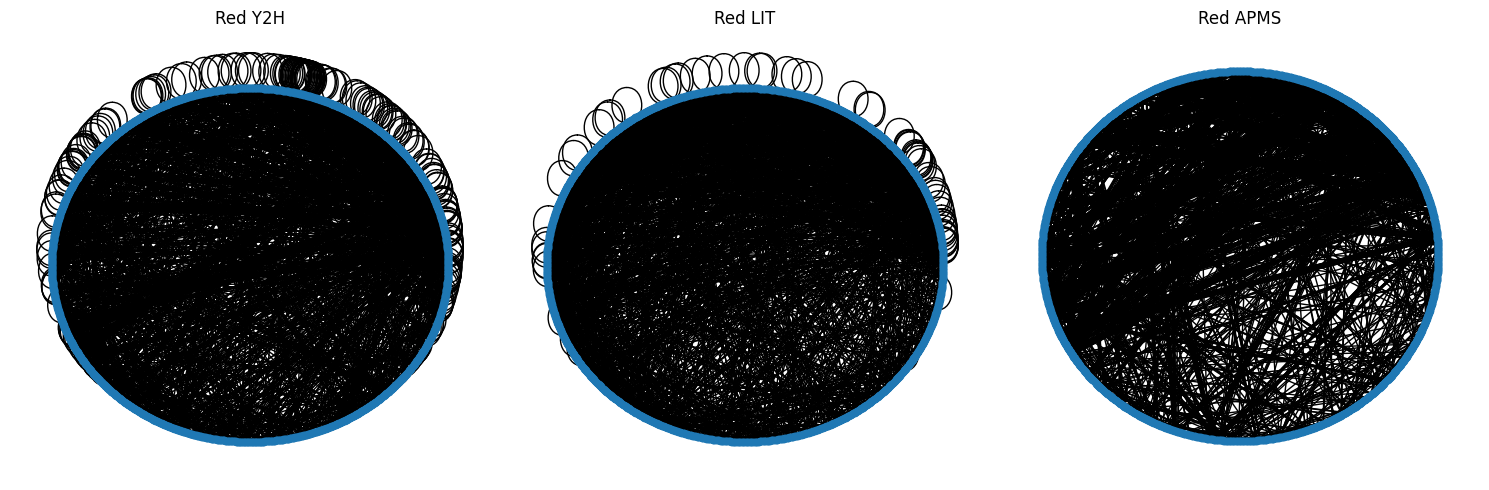

In [ ]:
from urllib.request import urlopen
from io import BytesIO
from zipfile import ZipFile
url = "http://materias.df.uba.ar/scytda2020c1/files/2020/04/TC01_data.zip"
with urlopen(url) as zipresp:
    with ZipFile(BytesIO(zipresp.read())) as zfile:
       archivos = zfile.namelist()
       for archivo in archivos:
           if archivo.endswith('.txt') or archivo.endswith('.gml') or archivo.endswith('.csv'):
               zfile.extract(archivo, '/content')

def abrir_txt(nombre_archivo):
    archivo=open(nombre_archivo)
    data=[]
    for linea in archivo:
        linea=linea.strip()
        columna=linea.split()
        data.append(columna)
    return data

import networkx as nx
Red_delfines = nx.read_gml('dolphins.gml')
import networkx as nx
import matplotlib.pylab as plt # se recomienda importar todos los paquetes en una celda aparte al principio del cuaderno
import pandas as pd
import numpy as np
# armamos el grafo de nx a partir del txt
lista_de_enlaces = abrir_txt('yeast_AP-MS.txt')
Red_APMS = nx.Graph()
Red_APMS.add_edges_from(lista_de_enlaces)
lista_de_enlaces = abrir_txt('yeast_LIT.txt')
Red_LIT = nx.Graph()
Red_LIT.add_edges_from(lista_de_enlaces)
# abrimos el txt
lista_de_enlaces = abrir_txt('yeast_Y2H.txt')
# armamos el grafo de nx a partir del archivo
Red_Y2H = nx.Graph()
Red_Y2H.add_edges_from(lista_de_enlaces) #lista_de_enlaces es la que obtuvimos aplicando la función abrir_txt a alguno de los .txt. En networkx, no es necesario agregar primero los nodos y luego los enlaces. Podemos pasar los enlaces y agrega los nodos automáticamente.
# graficamos la red

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Graficar la red Y2H
axs[0].set_title('Red Y2H')
nx.draw_circular(Red_Y2H, node_size=20, ax=axs[0])

# Graficar la red LIT
axs[1].set_title('Red LIT')
nx.draw_circular(Red_LIT, node_size=20, ax=axs[1])

# Graficar la red APMS
axs[2].set_title('Red APMS')
nx.draw_circular(Red_APMS, node_size=20, ax=axs[2])

plt.tight_layout()
plt.show()


Entre las opciones de diferentes visualizaciones de redes, la cicular permite ver como se consideran en la red Y2H muchos mas auto-loops en comparación con la LIT y la APMS que practicamente no tiene ninguno. Además se puede ver como en la APMS un cierto conjunto de proteinas en la parte inferior, no tiene tantas interacciones entre esí.

##Inciso (b)
Aquí usamos metodos ya existentes para sacar información de las redes.

In [ ]:
import pandas as pd
import numpy as np
# armamos el grafo de nx a partir del txt
lista_de_enlaces = abrir_txt('yeast_AP-MS.txt')
Red_APMS = nx.Graph()
Red_APMS.add_edges_from(lista_de_enlaces)
lista_de_enlaces = abrir_txt('yeast_LIT.txt')
Red_LIT = nx.Graph()
Red_LIT.add_edges_from(lista_de_enlaces)

#esta funcion es para sacar el maximo numero de grados, el minimo y el promedio
def grado(red):
  grados=[]
  nodos=[]
  for nodo, grado in red.degree():
    grados.append(grado)
    nodos.append(nodo)
  return np.mean(grados),max(grados),min(grados)

#esta funcion es para sacar el diametro de la componente gigante
def componente_gigante_diametro(red):
  comp_gigante=max(nx.connected_components(red), key=len)
  diametro=nx.diameter(red.subgraph(comp_gigante))
  return diametro


# Lo más cómodo es utilizar diccionarios para cada columna
diccionario_columna_nodos = {'Redes' : ['Red_Y2H', 'Red_APMS', 'Red_LIT'],
                             '# nodos' : [len(Red_Y2H.nodes()),len(Red_APMS.nodes()),len(Red_LIT.nodes())],
                             '# total enlaces':[Red_Y2H.number_of_edges(),Red_APMS.number_of_edges(),Red_LIT.number_of_edges()],
                             'red dirigida':[nx.is_directed(Red_Y2H),nx.is_directed(Red_APMS),nx.is_directed(Red_LIT)],
                             'Grado medio':[grado(Red_Y2H)[0],grado(Red_APMS)[0],grado(Red_LIT)[0]],
                             'Grado maximo':[grado(Red_Y2H)[1],grado(Red_APMS)[1],grado(Red_LIT)[1]],
                             'Grado minimo':[grado(Red_Y2H)[2],grado(Red_APMS)[2],grado(Red_LIT)[2]],
                             'Densidad':[nx.density(Red_Y2H),nx.density(Red_APMS),nx.density(Red_LIT)],
                             'Cluster medio':[nx.average_clustering(Red_Y2H),nx.average_clustering(Red_APMS),nx.average_clustering(Red_LIT)],
                             'Cluster red':[nx.transitivity(Red_Y2H),nx.transitivity(Red_APMS),nx.transitivity(Red_LIT)],
                             'Diametro':[componente_gigante_diametro(Red_Y2H),componente_gigante_diametro(Red_APMS),componente_gigante_diametro(Red_LIT)]}
# y así una llave para cada una de las características que querramos

tabla_comparativa = pd.DataFrame(data = diccionario_columna_nodos) # Existen múltiples atributos para esta función, recomendamos incursionar en la documentación de la librería
# Para visualizar la tabla, basta con escribir el nombre de la misma en la última línea de la celda utilizada y ejecutar
tabla_comparativa

,Redes,# nodos,# total enlaces,red dirigida,Grado medio,Grado maximo,Grado minimo,Densidad,Cluster medio,Cluster red,Diametro
0,Red_Y2H,2018,2930,False,2.903865,91,1,0.001440,0.046194,0.023614,14
1,Red_APMS,1622,9070,False,11.183724,127,1,0.006899,0.554636,0.618590,15
2,Red_LIT,1536,2925,False,3.808594,40,1,0.002481,0.292492,0.346193,19


## Inciso (c)
Las tres redes tienen un número de nodos parecido, en el mismo orden.
La red APMS tiene la mayor cantidad de enlaces, mayor densidad y coeficiente de cluster que las demás. Esto tiene sentido ya que se estudia una colección de proteinas que interactuan con la proteina objetivo, en lugar de proteina a proteina, como es el caso de la red Y2H en donde se estudian interacciones directas. Esto tambien se ve reflejado en el grado medio de cada red.
Bajo esta misma idea, el coeficiente de clustering es máximo para la red APMS, al trabajar con conjuntos de proteinas es posible que se identifiquen más estructuras agrupadas.

La red LIT al ser el estudio más aleatorio, en el sentido de generar interacciones si aparecen dos proteinas en la misma documentación, presenta un numero de enlaces parecidos a la Y2H y un grado medio levemente superior. Presenta un numero de cluster no no tan alto como la APMS, pero si superior a la Y2H. Esto es esperable ya que sería común en en varios papers se mencionen multiples proteinas, generando así más clusters, con la misma cantidad de nodos que la Y2H.


##Inciso (d)


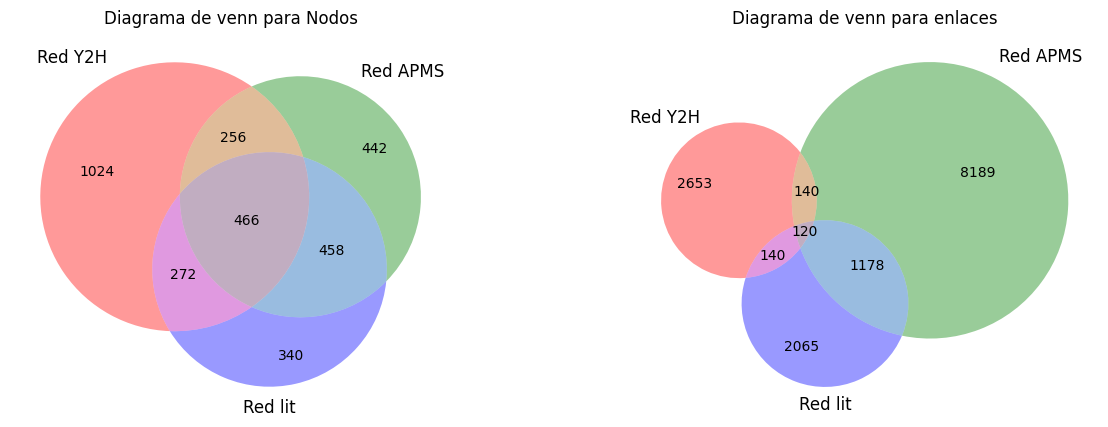

In [ ]:
from matplotlib_venn import venn2, venn3
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].set_title("Diagrama de venn para Nodos")
venn3([Red_Y2H.nodes(),Red_APMS.nodes(),Red_LIT.nodes()],('Red Y2H','Red APMS','Red lit'),ax=axs[0])

axs[1].set_title("Diagrama de venn para enlaces")
venn3([Red_Y2H.edges(),Red_APMS.edges(),Red_LIT.edges()],('Red Y2H','Red APMS','Red lit'),ax=axs[1])
plt.show()

#Ejercicio 2
En este ejercicio se busca estudiar una población de delfines y tratar de entender cómo son los vínculos entre dicha población y si dichos vínculos tienen que ver con el sexo de los delfines. Basicamente, queremos entender si la población de delfines es homofílica
##Inciso (a)
La idea de este inciso es explorar las distintas posibilidades de layout que nos otorga networkx en función de determinar cuál es la mejor para dar cuenta de la estructura subyacente a la red.
Existen múltilpes layouts, la idea es que probemos tres o cuatro. Algunos de ellos son: 'spring', 'random', 'circle'.
La nomenclatura para aplicar cada uno de ellos sería:

Graph with 62 nodes and 159 edges


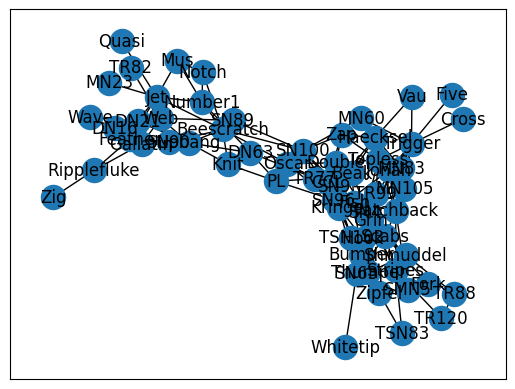

In [ ]:
Red_delfines=nx.read_gml("dolphins.gml")
print(Red_delfines)
nx.draw_networkx(Red_delfines, pos = nx.spring_layout(Red_delfines),with_labels=True)

Respuesta: En el método spring se observa un "puente" y dos clusters.
Esto es un indicio de que la separación por sexo ocurre.
Sin embargo, no es un resultado concluyente.


##Inciso (b)
La idea de este inciso es estudiar si existe o no homofilia en la red de delfines. La idea es estudiar la fracción de enlaces, sobre el total, que vincule delfines del mismo sexo. Una posibilidad es contar por separado aquellos enlaces que vinculan macho con macho, con los de hembra con hembra. Lo importante es comprender que resulta necesario saber si este valor es grande o chico, saber con qué compararlo. Para eso es necesario repetir el cálculo anterior (averiguar fracción de enlaces entre mismo sexo) sobre redes aleatorias. Pero enteniendo aleatoriedad en el sentido de romper algunas de las relaciones existentes en la red real pero no todas. Por ejemplo, una posibilidad es asignar los géneros aleatoriamente entre los delfines, utilizando la distribución real de géneros. Otra posibilidad es recablear la red, manteniendo la distirbución de grado intacta. Para esta última alternativa existen funciones en networkx.

Es necesario acoplar al grafo los labels de género para decidir esto.

In [ ]:
#Leer el txt del zip
tabla=abrir_txt("dolphinsGender.txt")
#asigno genero a delfines
for delfin in tabla:
  nombre_delfin=delfin[0]
  genero_delfin=delfin[1]
  Red_delfines.nodes[nombre_delfin]["genero"]=delfin[1]


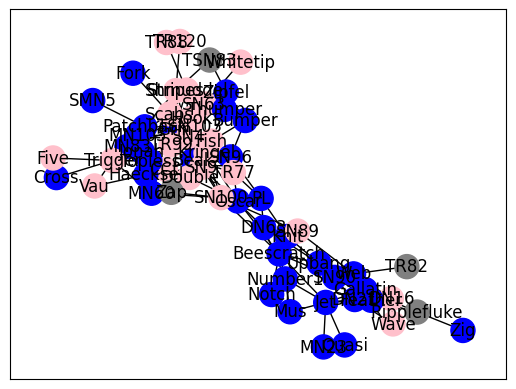

In [ ]:
#Ploteo según genero
def get_color(genero: str):
  match genero:
    case "f":
      return "pink"
    case "m":
      return "blue"
    case _:
      return "grey"
colores = [get_color(Red_delfines.nodes[node]['genero']) for node in Red_delfines.nodes]

nx.draw_networkx(Red_delfines, pos = nx.spring_layout(Red_delfines),with_labels=True,node_color=colores)


A simple vista no parece haber homofilia, igualmente falta hacer el análisis cuantitativo.

In [ ]:
#Obtengo la frecuencia de masculino, femenino, N/A
lista=[0,0,0]
for nodo in Red_delfines.nodes():
  match Red_delfines.nodes[nodo]["genero"]:
    case "m":
      lista[0]+=1
    case "f":
      lista[1]+=1
    case "NA":
      lista[2]+=1

norm = [float(i)/sum(lista) for i in lista]
print(lista)
print(norm)


[34, 24, 4]
[0.5483870967741935, 0.3870967741935484, 0.06451612903225806]


Hago un ensamble de 1000 variaciones usando el método de recoloreo

In [ ]:
#Usando la hipótesis nula del método de la bolsa:

#tengo que asignar al azar
ensemble_bolsa=[]
generos=["m","f","NA"]
pesos=[0.5483870967741935, 0.3870967741935484, 0.06451612903225806]
#backupeo mi red original
Red_original=Red_delfines.copy()
for red in range(1000):#hago 1000 redes
  red_nueva=Red_delfines.copy()
  for nodo in Red_delfines.nodes(): #recoloreo cada nodo en la red
    genero_nuevo=random.choices(population=generos,weights=pesos,k=1)
    red_nueva.nodes[nodo]["genero"]=genero_nuevo[0]
  ensemble_bolsa.append(red_nueva)



H0: Este grado de homofilia pertenece a un rango que puede ser generado por azar.

El N de conexiones homofílicas está dentro de un rango(95%) de las variaciones que pueden ser generadas al azar, cambiando el genero de los nodos.

La función siguiente devuelve la cantidad de enlaces de diferente tipo dada una red del tipo que estamos tratando(tiene que tener genero=f,m o NA)

In [ ]:
#esta funcion clasifica enlaces, de todas las variaciones que puede haber.

def clasificarEnlaces(Red):
  dict_enlaces={"Con m-m":0,"Con m-f":0,"Con f-f":0,"Con NA-NA":0,"Con NA-f":0,"Con NA-m":0}

  for enlace in Red.edges():
    sexo_1=Red.nodes[enlace[0]]["genero"]#sexo del delfin 1
    sexo_2=Red.nodes[enlace[1]]["genero"]#sexo del delfin 2
    match (sexo_1,sexo_2):
      case ("m","m"):
        dict_enlaces["Con m-m"]+=1
      case("f","f"):
        dict_enlaces["Con f-f"]+=1
      case("NA","NA"):
        dict_enlaces["Con NA-NA"]+=1
      case("m","f")|("f","m"):
        dict_enlaces["Con m-f"]+=1
      case("NA","f")|("f","NA"):
        dict_enlaces["Con NA-f"]+=1
      case("NA","m")|("m","NA"):
        dict_enlaces["Con NA-m"]+=1

  return dict_enlaces

Armo una tabla para plotear

In [ ]:
#armo la tabla para ensembles
df_ensembles_bolsa=pd.DataFrame(columns=["Con m-m","Con m-f","Con f-f","Con NA-NA","Con NA-f","Con NA-m"])
df_ensembles_bolsa=pd.concat([df_ensembles_bolsa,pd.DataFrame([clasificarEnlaces(Red_original)])])#la fila 0 es la original
for red in ensemble_bolsa:#hago una tabla clasificando enlaces
  conteo=clasificarEnlaces(red)
  conteo_df=pd.DataFrame([conteo])
  df_ensembles_bolsa=pd.concat([df_ensembles_bolsa,conteo_df],ignore_index=True)

df_ensembles_bolsa['Con homo']=df_ensembles_bolsa["Con m-m"]+df_ensembles_bolsa['Con f-f']+df_ensembles_bolsa['Con NA-NA']#hago una nueva columna donde pongo los enlaces homofílicos
df_ensembles_bolsa


,Con m-m,Con m-f,Con f-f,Con NA-NA,Con NA-f,Con NA-m,Con homo
0,60,52,36,0,4,7,96
1,64,66,21,0,3,5,85
2,54,66,17,0,9,13,71
3,84,59,9,0,3,4,93
4,62,70,16,0,3,8,78
...,...,...,...,...,...,...,...
996,75,63,16,0,1,4,91
997,54,75,29,0,1,0,83
998,37,62,33,0,14,13,70
999,71,66,15,0,2,5,86


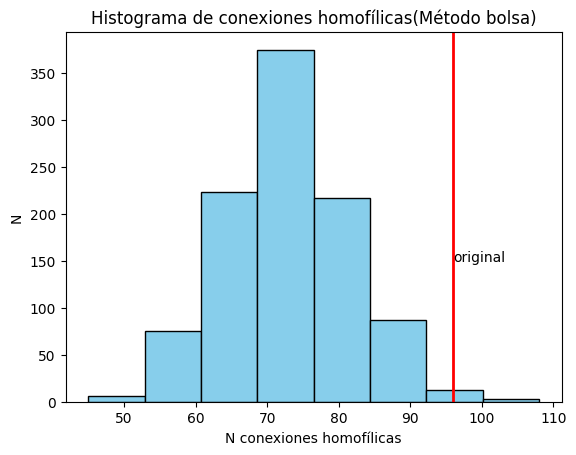

In [ ]:
# Ploteo
plt.hist(df_ensembles_bolsa.iloc[1:1000]['Con homo'], bins=8,edgecolor='black',color='skyblue')
plt.axvline(x=df_ensembles_bolsa.iloc[0]['Con homo'], color='red',linewidth=2)#linea roja pertenece a la red original
plt.text(x=df_ensembles_bolsa.iloc[0]['Con homo'],y=150,s='original')
plt.title("Histograma de conexiones homofílicas(Método bolsa)")
plt.xlabel('N conexiones homofílicas')
plt.ylabel('N')
plt.show()

In [ ]:
#calculo cuantos ensembles tienen mas conexiones homofílicas que la original
conteo_mayor=pd.Series(df_ensembles_bolsa['Con homo']>=96).sum()
print("p valor: "+str(conteo_mayor/1000))#p_valor

p valor: 0.009


La probabilidad de encontrar una red con mayor homofilia que la original es menor a 0.05, rechazo la Hipótesis Nula y acepto la Hipótesis Alternativa

In [ ]:
#Usando la hipótesis nula del método del recableado:
#Tarda una banda, nswap muy ato
nswap=159*10
max_tries=nswap*10

#tengo que asignar al azar
ensemble_recableado=[]
for red in range(1000):#hago 1000 redes para el ensemble
  red_nueva=Red_delfines.copy()
  red_nueva=nx.double_edge_swap(red_nueva,nswap=nswap,max_tries=max_tries)
  ensemble_recableado.append(red_nueva)

In [ ]:
#Armo tabla enlaces recableado

df_ensembles_recableado=pd.DataFrame(columns=["Con m-m","Con m-f","Con f-f","Con NA-NA","Con NA-f","Con NA-m"])
df_ensembles_recableado=pd.concat([df_ensembles_recableado,pd.DataFrame([clasificarEnlaces(Red_original)])])#la fila 0 es la original
for red in ensemble_recableado:#hago una tabla clasificando enlaces
  conteo=clasificarEnlaces(red)
  conteo_df=pd.DataFrame([conteo])
  df_ensembles_recableado=pd.concat([df_ensembles_recableado,conteo_df],ignore_index=True)

df_ensembles_recableado['Con homo']=df_ensembles_recableado["Con m-m"]+df_ensembles_recableado['Con f-f']+df_ensembles_recableado['Con NA-NA']#hago una nueva columna donde pongo los enlaces homofílicos
df_ensembles_recableado

,Con m-m,Con m-f,Con f-f,Con NA-NA,Con NA-f,Con NA-m,Con homo
0,60,52,36,0,4,7,96
1,50,75,23,0,7,4,73
2,52,73,24,1,7,2,77
3,50,71,27,0,3,8,77
4,51,70,27,0,4,7,78
...,...,...,...,...,...,...,...
996,50,75,24,1,5,4,75
997,55,61,32,0,3,8,87
998,48,77,25,2,1,6,75
999,53,66,29,0,4,7,82


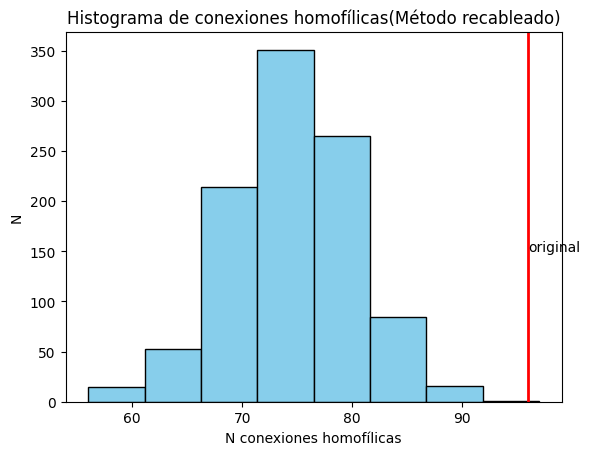

In [ ]:
plt.hist(df_ensembles_recableado.iloc[1:1000]['Con homo'], bins=8,edgecolor='black',color='skyblue')
plt.axvline(x=df_ensembles_recableado.iloc[0]['Con homo'], color='red',linewidth=2)#linea roja pertenece a la red original
plt.text(x=df_ensembles_recableado.iloc[0]['Con homo'],y=150,s='original')
plt.title("Histograma de conexiones homofílicas(Método recableado)")
plt.xlabel('N conexiones homofílicas')
plt.ylabel('N')
plt.show()

In [ ]:
conteo_mayor=pd.Series(df_ensembles_recableado['Con homo']>=96).sum()
print("p valor: "+str(conteo_mayor/1000))#p_valor

p valor: 0.002


###Análisis

Mi p-valor es menor que 0.05, por lo tanto rechazo la hipótesis nula y acepto la hipótesis alternativa

In [ ]:
indice_homofilico=0#h en las guías
num_enlaces=Red_original.number_of_edges()#m en las guias

for enlace in Red_original.edges():
  genero_1=Red_original.nodes[enlace[0]]['genero']
  genero_2=Red_original.nodes[enlace[1]]['genero']
  if(genero_1==genero_2):
    indice_homofilico+=1

indice_homofilico=indice_homofilico/num_enlaces#no divido por 2 porque no recorro la matriz, sino los enlaces
print(indice_homofilico)

0.6037735849056604


In [ ]:
indice_homofilico_azar=0#h_azar en las guías
num_enlaces=Red_original.number_of_edges()#m en las guias

for enlace in Red_original.edges():
  genero_1=Red_original.nodes[enlace[0]]['genero']
  genero_2=Red_original.nodes[enlace[1]]['genero']
  if(genero_1==genero_2):
    grado_1=Red_original.degree(enlace[0])
    grado_2=Red_original.degree(enlace[1])
    indice_homofilico_azar+=grado_1*grado_2

indice_homofilico_azar=indice_homofilico_azar/(num_enlaces*2)
print(indice_homofilico_azar)

13.80503144654088
